In [1]:
from scipy import signal
import numpy as np
import pandas as pd
from matplotlib.pyplot import *

%matplotlib inline

In [2]:
d = pd.read_csv('../data/data_sintel_fake.csv')
d.head()

,timestamps,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Marker
0,1.490135e+09,13.866,16.730,17.138,-68.337,0
1,1.490135e+09,15.779,12.635,14.599,-69.145,0
2,1.490135e+09,15.472,16.871,13.249,-72.145,0
3,1.490135e+09,13.120,18.428,19.653,-69.730,0
4,1.490135e+09,10.446,14.864,13.183,-74.267,0


In [12]:
## Check the sample rate (should be 200 Hz)
fs = 1/np.mean(np.diff(d.timestamps))

In [16]:
X = np.array(d.ix[:, 1:5])

In [19]:
b, a = signal.butter(2, (2/fs, 40/fs), btype='bandpass')
eeg = signal.filtfilt(b, a, X, axis=0)

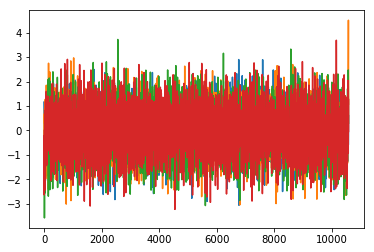

In [20]:
_ = plot(eeg)

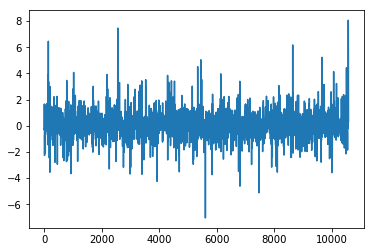

In [24]:
plot(eeg[:, 2] * eeg[:, 1])